In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


## Hello welcome to my new notebook 
**In this we analysis netflix dataset now I'm just a fresher but I tried my best in this and get some of code from the 'Netflix Userdatabase Analysis'. If you enjoyed it don't forget to upvote this notebook.**

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
netflix = pd.read_csv('../input/netflix-userbase-dataset/Netflix Userbase.csv')

In [4]:
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
netflix.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


## **Below we plot bar grph on *Subsciption Type* and know more about the subscription which is the most common subscription people take.**

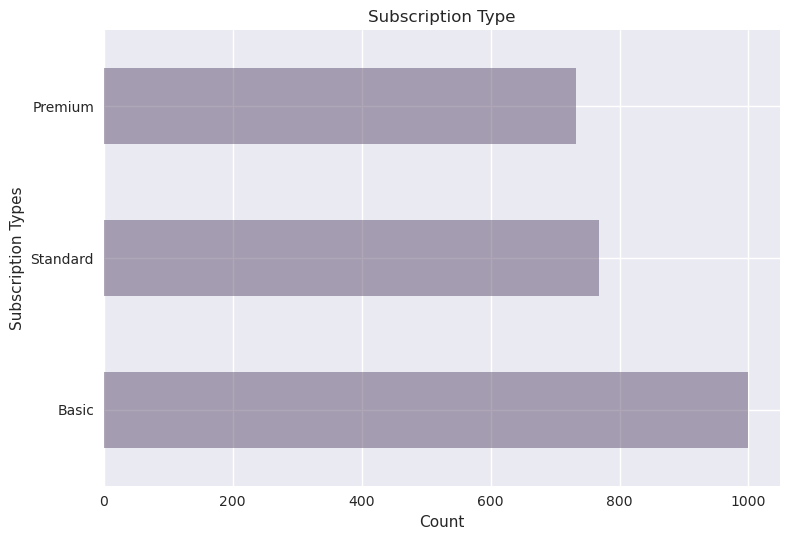

In [7]:
plt.style.use('seaborn')
netflix['Subscription Type'].value_counts().plot(kind='barh', color='#5467')
plt.title('Subscription Type')
plt.xlabel('Count')
plt.ylabel('Subscription Types')
plt.tight_layout()

## **Below we plot a graph on the basis of *Country* and with respect to the *Subscription Table***

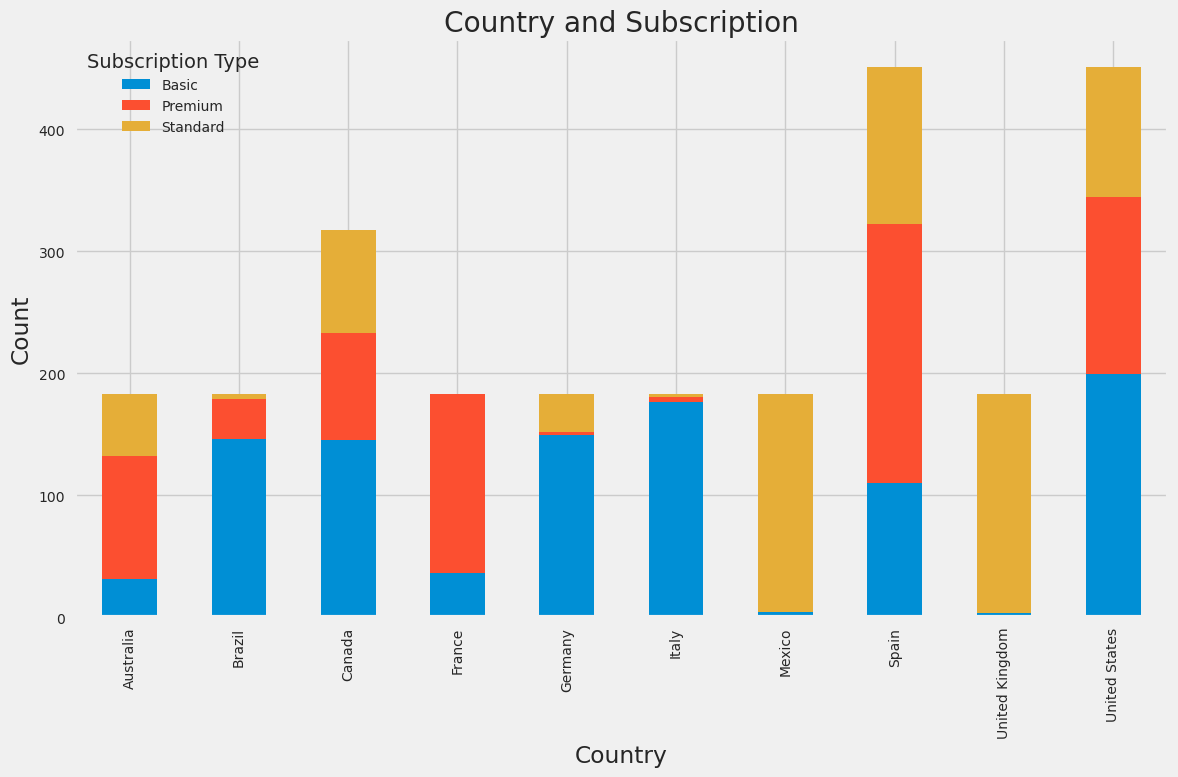

In [8]:
plt.style.use('fivethirtyeight')
subscription_count = netflix.groupby(['Country','Subscription Type'])['User ID'].count().unstack()
subscription_count.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Country and Subscription')
plt.ylabel('Count')
plt.tight_layout()

## **Below we did analysis on *Country* table**

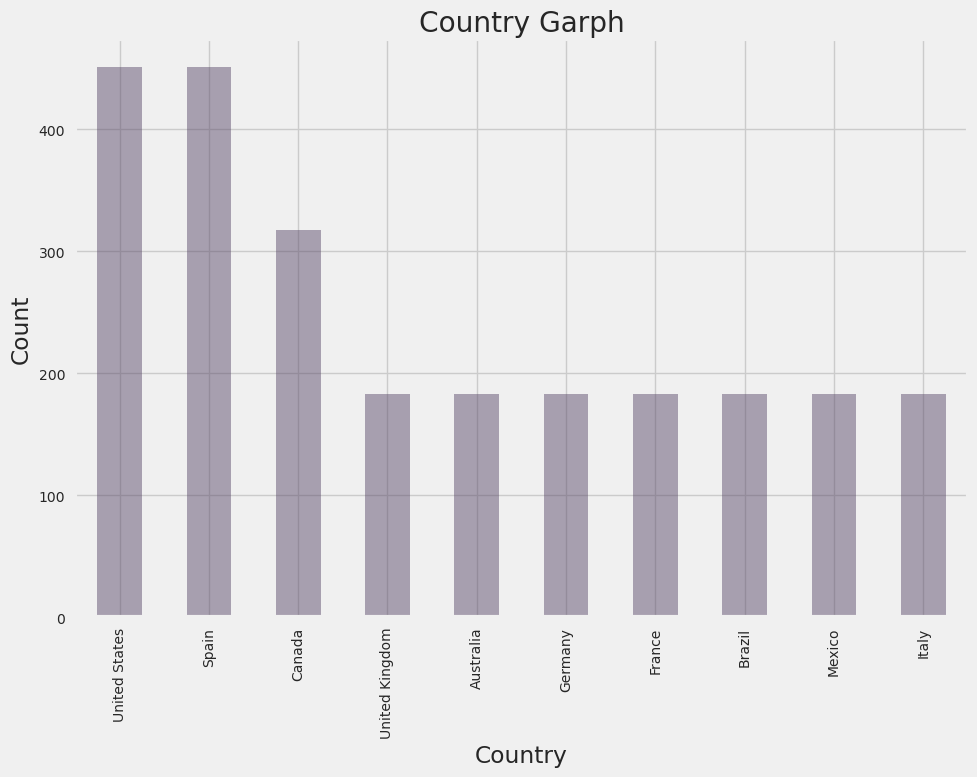

In [9]:
plt.style.use('fivethirtyeight')
netflix['Country'].value_counts().plot(kind='bar', color='#5467', figsize=(10,8))
plt.title('Country Garph')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()

## **Similarly we do with *Age* column also**

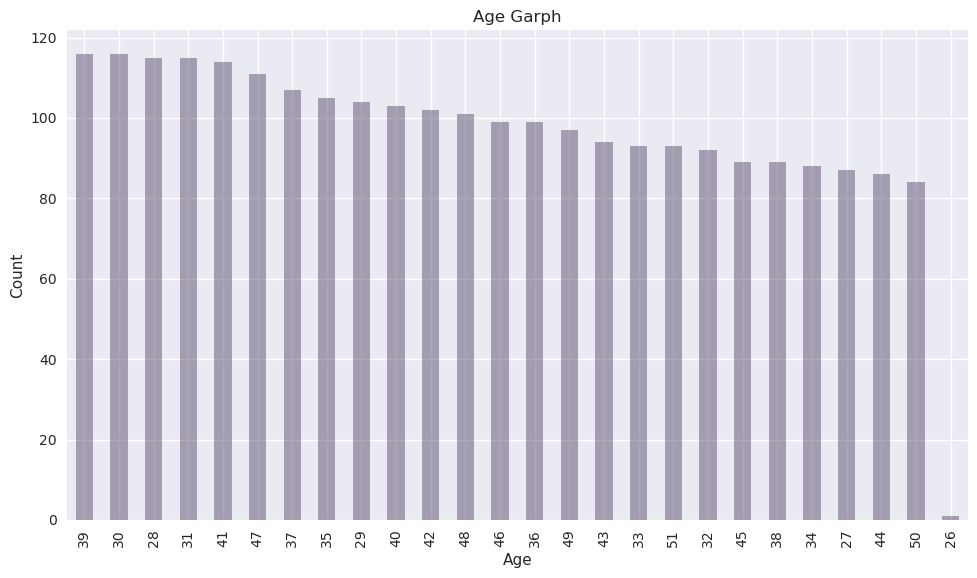

In [10]:
plt.style.use('seaborn')
netflix['Age'].value_counts().plot(kind='bar', color='#5467', figsize=(10,6))
plt.title('Age Garph')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()

## **Then we draw a pie chart with *Gender* column**

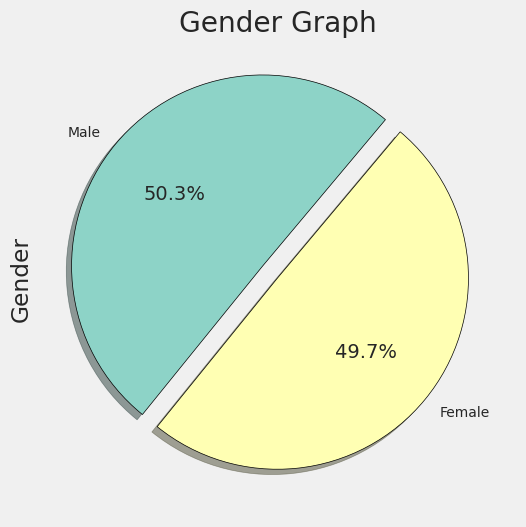

In [11]:
plt.style.use('fivethirtyeight')
explode = [0.1, 0]
label = ['Male', 'Female']
netflix['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow = True,
                                      explode = explode ,
                                      colors=plt.cm.Set3.colors, startangle=50,
                                      wedgeprops={'edgecolor':'black'}, labels = label)
plt.title('Gender Graph')
plt.tight_layout()

## **Similarly we do with the *device* column**

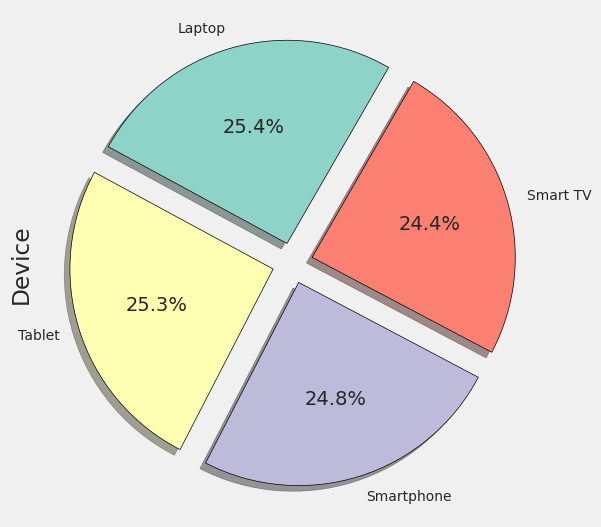

In [12]:
device = netflix['Device']
explode = [0.1, 0.1, 0.1, 0.1]
device.value_counts().plot(kind='pie',colors=plt.cm.Set3.colors, startangle=60, autopct='%1.1f%%',
                          wedgeprops={'edgecolor':'black'}, shadow = True, explode = explode)
plt.tight_layout()

## **In table their are two columns *Join Table* and *Last Payment Date* this are the dates columns we convert it for our further use and create *Duration of plan* column in that it contains all the day of the users uses its account or its subscription is on**

In [13]:
netflix['Join date'] = pd.to_datetime(netflix['Join Date'], format='%d-%m-%y')
netflix['Last Payment Date'] = pd.to_datetime(netflix['Last Payment Date'], format='%d-%m-%y')
netflix['Duration of plan'] = (netflix['Last Payment Date'] - netflix['Join date']).dt.days
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join date,Duration of plan
0,1,Basic,10,15-01-22,2023-06-10,United States,28,Male,Smartphone,1 Month,2022-01-15,511
1,2,Premium,15,05-09-21,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09-05,655
2,3,Standard,12,28-02-23,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-02-28,119
3,4,Standard,12,10-07-22,2023-06-26,Australia,51,Female,Laptop,1 Month,2022-07-10,351
4,5,Basic,10,01-05-23,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-05-01,58


## **We plot graph on *Country* column with the respect to *Duration of plan* which contain all the days of existing subscription of user**

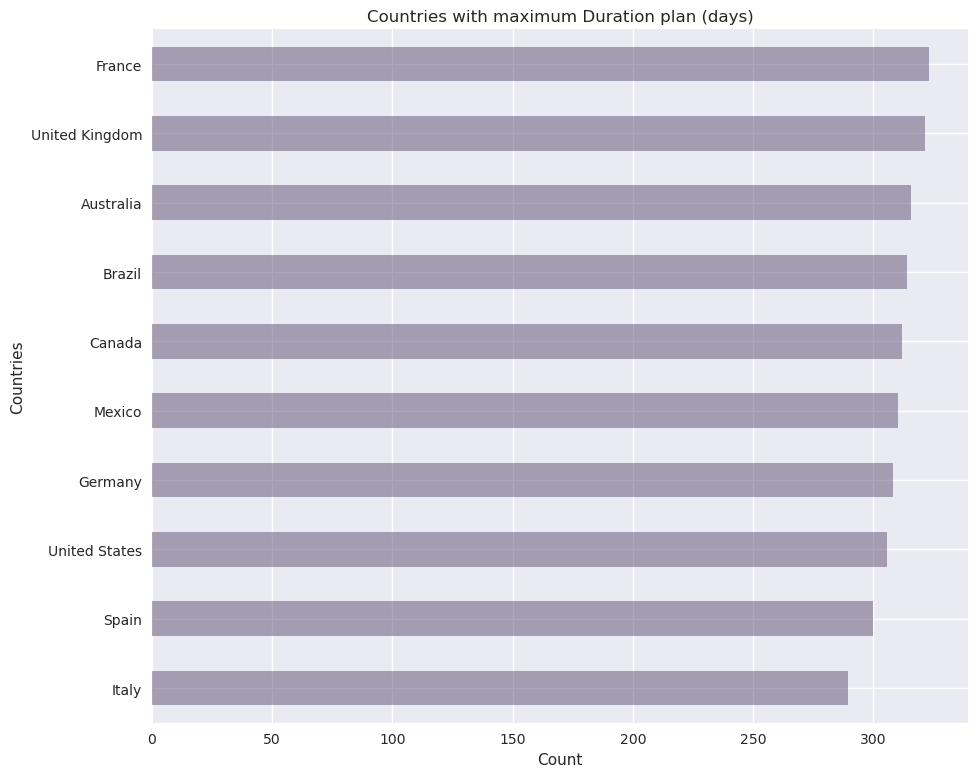

In [14]:
plt.style.use('seaborn')
avg_duration_of_country = netflix.groupby('Country')['Duration of plan'].mean().sort_values()
avg_duration_of_country.plot(kind='barh', color='#5467', figsize=(10,8))
plt.title('Countries with maximum Duration plan (days)')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.tight_layout()

## **Similarly we do with *Subscription column***

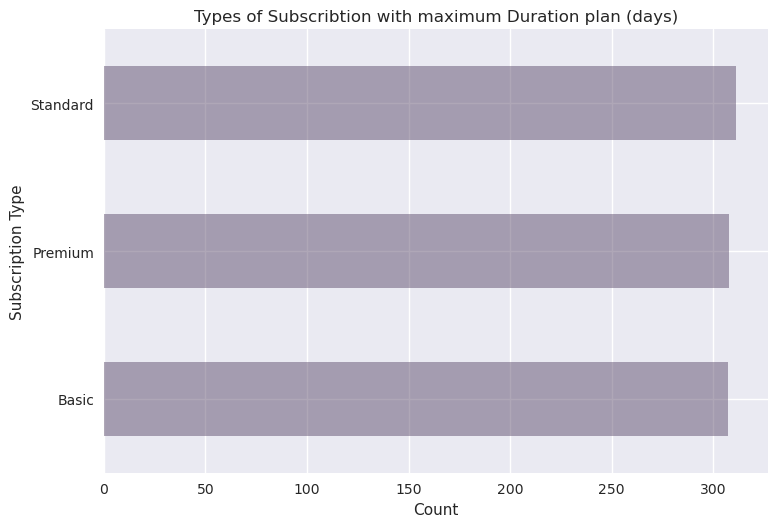

In [15]:
plt.style.use('seaborn')
avg_duration_by_plan = netflix.groupby('Subscription Type')['Duration of plan'].mean().sort_values()
avg_duration_by_plan.plot(kind='barh', color='#5467')
plt.title('Types of Subscribtion with maximum Duration plan (days)')
plt.xlabel('Count')
plt.ylabel('Subscription Type')
plt.tight_layout()

In [16]:
# We create a function in that we add months of the Netflix plan
netflix['Duration in month'] = netflix['Duration of plan'] / 30

In [17]:
# Then we use the that column to calculate the Monthly revenue in according to months 
# Perviously it according to days we convert it into months
netflix['Monthly Revenue 1'] = netflix['Monthly Revenue'] * netflix['Duration in month']

## **We group *Country* and *Monthly Revenue 1* column then plot the countries according to *Monthly Revenue 1 *column**

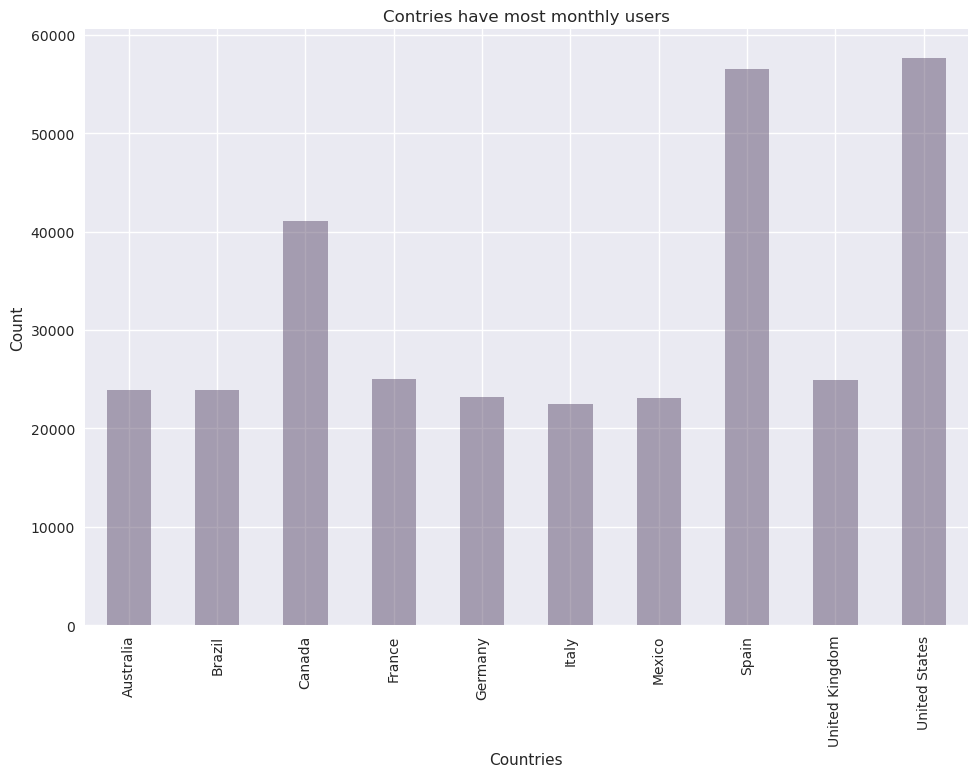

In [18]:
monthly_country_revenue = netflix.groupby('Country')['Monthly Revenue 1'].sum()
monthly_country_revenue.plot(kind='bar', color='#5467', figsize = (10,8))
plt.title('Contries have most monthly users')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.tight_layout()

## **Similarly we can do with other columns and we did that see below**

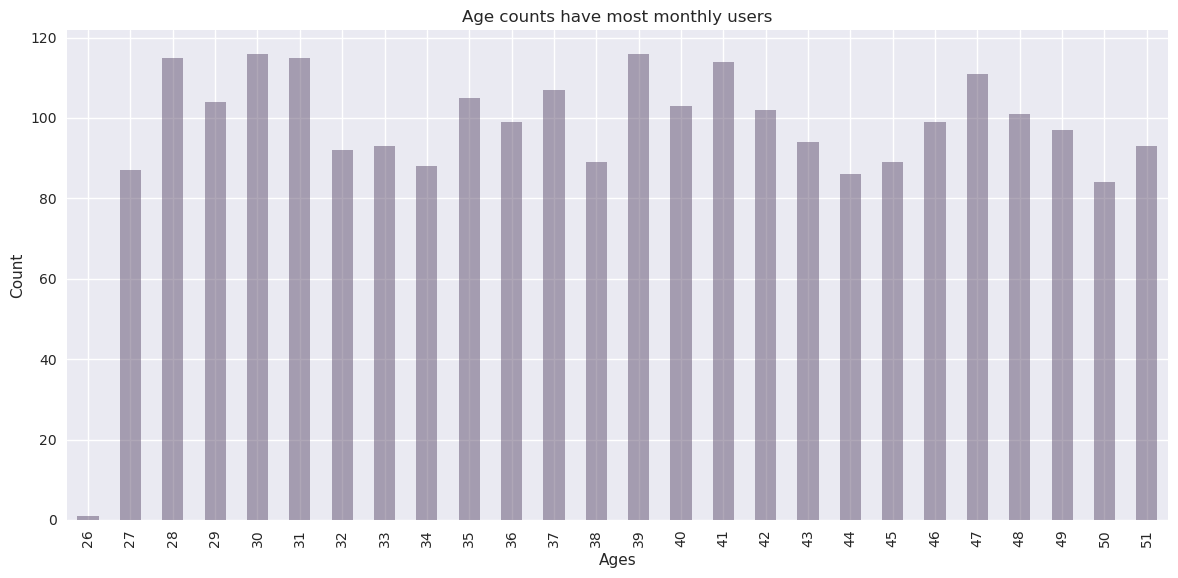

In [19]:
plt.style.use('seaborn')
age_counts_monthly = netflix.groupby('Age')['Monthly Revenue 1'].count()
age_counts_monthly.plot(kind = 'bar', color = '#5467', figsize = (12,6))
plt.title('Age counts have most monthly users')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.tight_layout()

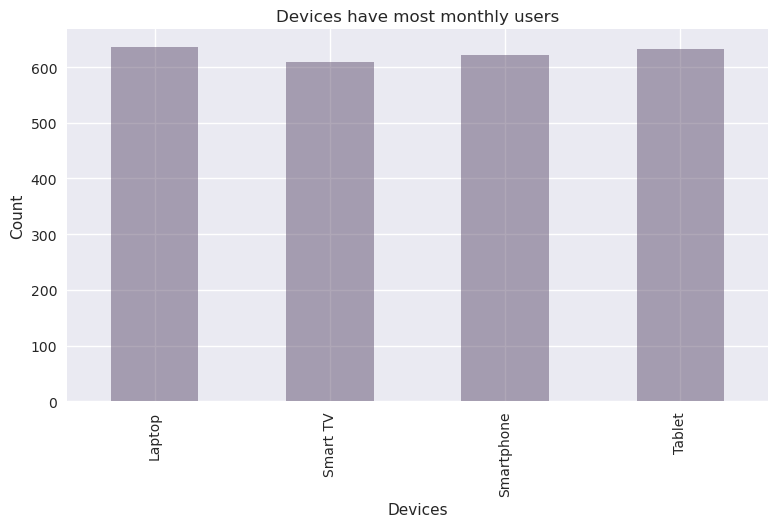

In [20]:
device_count = netflix.groupby('Device')['Monthly Revenue 1'].count()
device_count.plot(kind = 'bar', color = '#5467')
plt.title('Devices have most monthly users')
plt.xlabel('Devices')
plt.ylabel('Count')
plt.tight_layout()

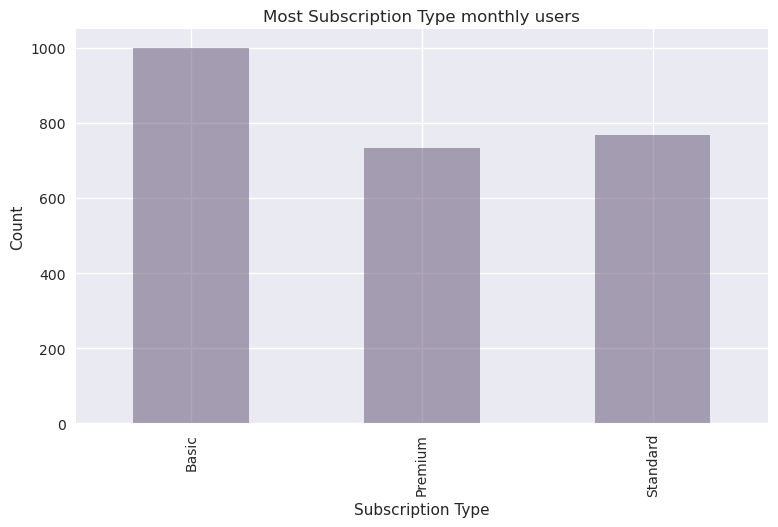

In [21]:
plt.style.use('seaborn')
Subscription_revenue = netflix.groupby('Subscription Type')['Monthly Revenue 1'].count()
Subscription_revenue.plot(kind = 'bar', color = '#5467')
plt.title('Most Subscription Type monthly users')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.tight_layout()